In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
from scipy import stats
from pandas.plotting import autocorrelation_plot
from scipy import signal
from sklearn import linear_model
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_pickle('MaunaLoa_Detrend.pickle')

In [4]:
df.head()

,Original,Performance,Interpolated,WeekIndex,LinearFit,LinearDetrend,SGSeasonalTrend,SGLongTermTrend,SGSeasonalDetrend,SGLongTermDetrend
Timestamp,,,,,,,,,,
1974-05-19,333.34,6,333.34,0,326.433862,6.906138,333.798807,329.590409,-0.458807,3.749591
1974-05-26,332.95,6,332.95,1,326.467467,6.482533,333.308328,329.614732,-0.358328,3.335268
1974-06-02,332.32,5,332.32,2,326.501073,5.818927,332.835895,329.639076,-0.515895,2.680924
1974-06-09,332.18,7,332.18,3,326.534678,5.645322,332.381506,329.663442,-0.201506,2.516558
1974-06-16,332.37,7,332.37,4,326.568283,5.801717,331.945162,329.687830,0.424838,2.682170


In [5]:
ktrends = [c for c in df.columns if c.endswith('Trend') or c.endswith('Fit')]
kdetrends = [c for c in df.columns if c.endswith('Detrend')]

In [6]:
P = np.arange(7)
D = np.arange(3)
Q = np.arange(3)

In [7]:
res = pd.DataFrame(columns=['p', 'd', 'q', 'AIC', 'BIC'])
res

,p,d,q,AIC,BIC


for p in P:
    for d in D:
        for q in Q:
            order = (p,d,q)
            print(order)
            model = ARIMA(df['Interpolated'], order)
            try:
                fit = model.fit()
                x = pd.DataFrame([[p, d, q, fit.aic, fit.bic]], columns=['p', 'd', 'q', 'AIC', 'BIC'])
                res = res.append(x, ignore_index=True)
            except Exception as err:
                print('Fail: %s' % err)

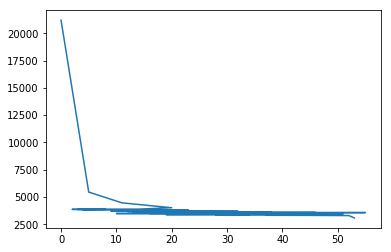

In [9]:
res.sort_values('AIC')['AIC'].plot()

In [10]:
res.sort_values('AIC')

,p,d,q,AIC,BIC
53,6,1,2,3073.005639,3130.541875
52,6,1,1,3287.119873,3338.902485
45,5,1,2,3305.766678,3357.549290
37,4,1,2,3314.997934,3361.026923
50,6,0,2,3326.729590,3384.270116
42,5,0,2,3333.308157,3385.094631
28,3,1,2,3336.173173,3376.448538
34,4,0,2,3352.997474,3399.029895
19,2,1,2,3375.343215,3409.864956
25,3,0,2,3388.924133,3429.202501


In [27]:
model = ARIMA(df['Interpolated'], order=(12, 1, 0))
fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [28]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Interpolated   No. Observations:                 2330
Model:                ARIMA(12, 1, 0)   Log Likelihood               -1661.530
Method:                       css-mle   S.D. of innovations              0.494
Date:                Fri, 25 Jan 2019   AIC                           3351.061
Time:                        11:29:14   BIC                           3431.611
Sample:                    05-26-1974   HQIC                          3380.409
                         - 01-13-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0332      0.017      1.917      0.055      -0.001       0.067
ar.L1.D.Interpolated     -0.1691      0.021     -8.213      0.000      -0.209      -0.129
ar.L2.D.Interpolated      0.0623      0.021      3.009      0.003       0.022       0.103
ar.L3.D.Interpolated      0.1887      0.021      9.123      0.000       0.148       0.229
ar.L4.D.Interpolated      0.2978      0.021     14.223      0.000       0.257       0.339
ar.L5.D.Interpolated      0.2232      0.022     10.225      0.000       0.180       0.266
ar.L6.D.Interpolated      0.1483      0.022      6.674      0.000       0.105       0.192
ar.L7.D.Interpolated      0.1015      0.022      4.569      0.000       0.058       0.145
ar.L8.D.Interpolated     -0.0145      0.022     -0.663      0.507      -0.057       0.028
ar.L9.D.Interpolated     -0.1032      0.021     -4.927      0.000      -0.144      -0.062
ar.L10.D.Interpolated    -0.0766      0.021     -3.694      0.000      -0.117      -0.036
ar.L11.D.Interpolated    -0.1386      0.021     -6.676      0.000      -0.179      -0.098
ar.L12.D.Interpolated    -0.1107      0.021     -5.357      0.000      -0.151      -0.070
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0624           -0.1768j            1.0771           -0.0262
AR.2             1.0624           +0.1768j            1.0771            0.0262
AR.3             0.7227           -0.9582j            1.2002           -0.1472
AR.4             0.7227           +0.9582j            1.2002            0.1472
AR.5             0.2015           -1.1985j            1.2153           -0.2235
AR.6             0.2015           +1.1985j            1.2153            0.2235
AR.7            -0.3649           -1.1226j            1.1804           -0.3000
AR.8            -0.3649           +1.1226j            1.1804            0.3000
AR.9            -0.9589           -0.7756j            1.2333           -0.3918
AR.10           -0.9589           +0.7756j            1.2333            0.3918
AR.11           -1.2889           -0.2568j            1.3142           -0.4687
AR.12           -1.2889           +0.2568j            1.3142            0.4687
------------------------------------------------------------------------------
"""

In [29]:
residuals = pd.DataFrame(fit.resid, columns=['residuals'])
residuals.head()

,residuals
Timestamp,
1974-05-26,-0.423192
1974-06-02,-0.658495
1974-06-09,-0.088224
1974-06-16,0.367291
1974-06-23,-0.515445


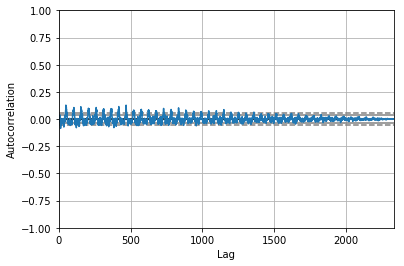

In [30]:
autocorrelation_plot(residuals)

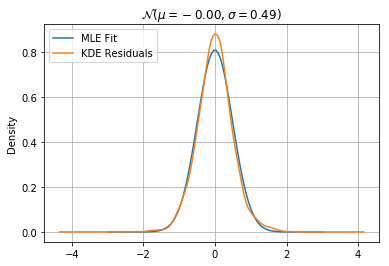

In [31]:
t = np.linspace(-3, 3, 100)
p = stats.norm.fit(residuals)
fig, axe = plt.subplots()
axe.plot(t, stats.norm(*p).pdf(t))
residuals.plot(kind='kde', ax=axe)
axe.set_title(r'$\mathcal{N}(\mu=%.2f,\sigma=%.2f)$' % p)
axe.legend(['MLE Fit', 'KDE Residuals'], loc='upper left')
axe.grid()

In [32]:
preds = fit.predict(2, len(df['Interpolated'])+52*12, typ='levels')

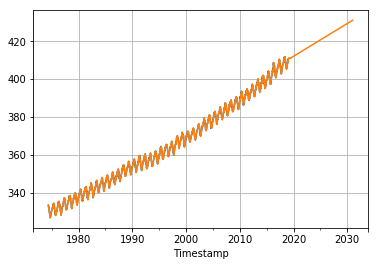

In [33]:
ax = df['Interpolated'].plot()
preds.plot(ax=ax)
ax.grid()